In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%cd ~/hdstats

/home/251/dxr251/hdstats


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import hdstats

from mpl_toolkits.mplot3d import axes3d

In [25]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(precision=4, suppress=True, linewidth=120)
plt.style.use('./docs/hdstats.mplstyle')

## What happens to covariance when the data dimensionality becomes large?

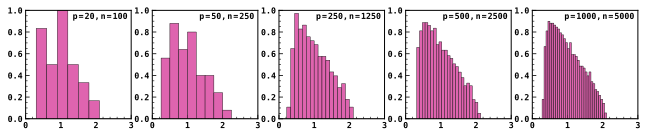

In [26]:
ps = [20, 50, 250, 500, 1000]
y = 0.2 # p/n ratio

fig, axes = plt.subplots(1, len(ps), figsize=(2.2*len(ps),2))

for i, p in enumerate(ps):
    n = int(p/y)
    mu = np.zeros(p)
    Sigma = np.eye(p)
    mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
    X = mn.rvs(n).T
    S = np.cov(X)
    Ls = np.linalg.eigvalsh(S)

    axes[i].hist(Ls, 'sqrt', range=(0, 3), density=True)
    axes[i].text(2.9, 0.92, f'$p={p}, n={n}$', horizontalalignment='right', size='small')

for i in range(len(ps)):
    axes[i].set_xlim((0, 3))
    axes[i].set_ylim((0, 1.))

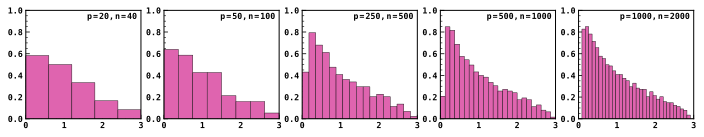

In [27]:
ps = [20, 50, 250, 500, 1000]
y = 0.5 # p/n ratio

fig, axes = plt.subplots(1, len(ps), figsize=(12,2))

for i, p in enumerate(ps):
    n = int(p/y)
    mu = np.zeros(p)
    Sigma = np.eye(p)
    mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
    X = mn.rvs(n).T
    S = np.cov(X)
    Ls = np.linalg.eigvalsh(S)

    axes[i].hist(Ls, 'sqrt', range=(0, 3), density=True)
    axes[i].text(2.9, 0.92, f'$p={p}, n={n}$', horizontalalignment='right', size='small')

for i in range(len(ps)):
    axes[i].set_xlim((0, 3))
    axes[i].set_ylim((0, 1.))

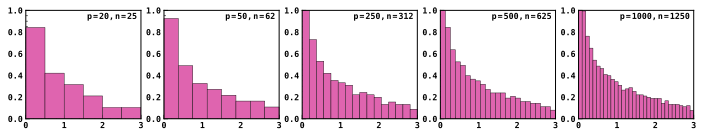

In [28]:
ps = [20, 50, 250, 500, 1000]
y = 0.8 # p/n ratio

fig, axes = plt.subplots(1, len(ps), figsize=(12,2))

for i, p in enumerate(ps):
    n = int(p/y)
    mu = np.zeros(p)
    Sigma = np.eye(p)
    mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
    X = mn.rvs(n).T
    S = np.cov(X)
    Ls = np.linalg.eigvalsh(S)

    axes[i].hist(Ls, 'sqrt', range=(0, 3), density=True)
    axes[i].text(2.9, 0.92, f'$p={p}, n={n}$', horizontalalignment='right', size='small')

for i in range(len(ps)):
    axes[i].set_xlim((0, 3))
    axes[i].set_ylim((0, 1.))

## Marchenko-Pastur density

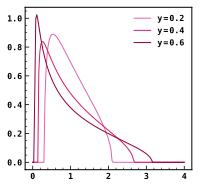

In [29]:
x = np.linspace(0, 4, 150)
for y in [0.2, 0.4, 0.6]:
    mp = hdstats.MarchenkoPastur(y, 1.0)
    plt.plot(x, mp.pdf(x), label=f'$y={y}$')
plt.legend()

## Distribution of eigenvalues of Wishart random matrix

In [30]:
n = 10000
p = 1000
y = p/n

In [31]:
wd = hdstats.Wishart(n, np.eye(p))

In [32]:
%time
X = wd.rvs().T
Ls = np.linalg.eigvalsh(X/n)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.48 µs


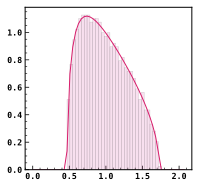

In [33]:
_, bins, patches = plt.hist(np.ravel(Ls), 'sqrt', range=(0, 1.2*np.max(Ls)), density=True, alpha=0.2)
mp = hdstats.MarchenkoPastur(y, 1.0)
plt.plot(bins, mp.pdf(bins));

## Distribution of eigenvalues of sample covariance matrices

In [34]:
n = 1000
p = 50
y = p/n

print(f'y={y}')

y=0.05


In [35]:
mu = np.zeros(p)
Sigma = np.eye(p)
mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)

In [36]:
X = mn.rvs(n).T

In [37]:
X.shape

(50, 1000)

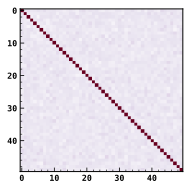

In [38]:
R = np.corrcoef(X)
plt.imshow(R)

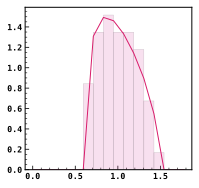

In [39]:
S = np.matmul(X,X.T)/n
Ls = np.linalg.eigvalsh(S)

_, bins, patches = plt.hist(np.ravel(Ls), 'sqrt', range=(0, 1.2*np.max(Ls)), density=True, alpha=0.2)
mp = hdstats.MarchenkoPastur(y, 1.0)
plt.plot(bins, mp.pdf(bins));

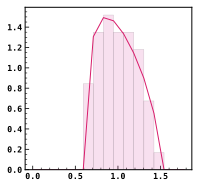

In [40]:
S = np.cov(X)
Ls = np.linalg.eigvalsh(S)

_, bins, patches = plt.hist(np.ravel(Ls), 'sqrt', range=(0, 1.2*np.max(Ls)), density=True, alpha=0.2)
mp = hdstats.MarchenkoPastur(y, 1.0)
plt.plot(bins, mp.pdf(bins));